# Image Histograms 

**Objectives:**

* Calculating and plotting image histograms
* Applying histogram equalisation technique to improve the image contrast
* Comparing two images by measuring the similarity between their histograms

## Importing important packages and libraries ##

In [35]:
# Importing libraries, packages and the image file
import numpy as np
import cv2 as cv
import math

img = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-1.3C\Resources_1.3\img1.jpg')

## Calculating the histogram for the Blue/Green/Read channel of img ##

### For Blue Channel ###

In [2]:
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) #[0] for blue channel

## Plotting the Histogram (hist_blue) ##

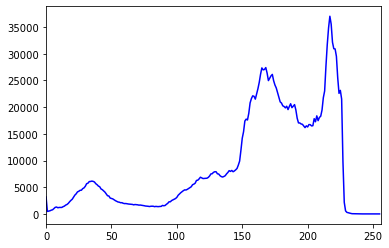

In [3]:
from matplotlib import pyplot as plt
plt.plot(hist_blue, color = 'b')
plt.xlim([0,256])
plt.savefig('hist_blue.png')
plt.show()

### For Green Channel ###


In [4]:
hist_green = cv.calcHist([img],[1],None,[256],[0,256]) #[1] for green channel

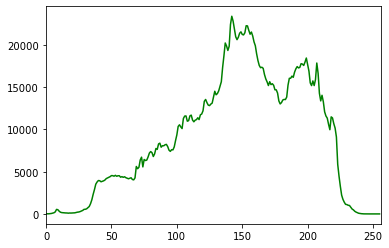

In [5]:
plt.plot(hist_green, color = 'g')
plt.xlim([0,256])
plt.savefig('hist_green.png')
plt.show()

### For Red Channel ###


In [6]:
hist_red = cv.calcHist([img],[2],None,[256],[0,256]) #[2] for red channel

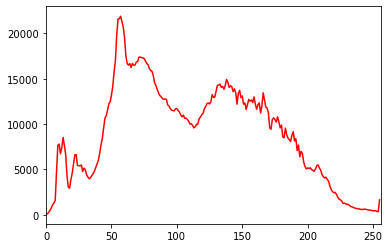

In [7]:
plt.plot(hist_red, color = 'r')
plt.xlim([0,256])
plt.savefig('hist_red.png')
plt.show()

## Histogram equalisation ##

Histogram equalisation is a technique used to improve the quality of images by avoiding inequality in the distribution of intensity, i.e., preventing large portions of the same intensity. To better observe the effect of histogram equalisation, we will work on the grayscale version of img.

### We first convert img to its grayscale version ###

In [8]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

### Calculating and plotting the histogram of 'img_gray' ###

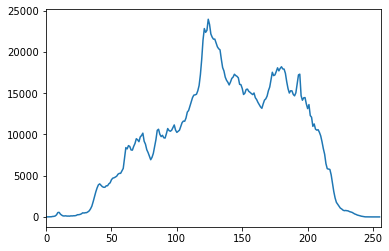

In [9]:
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.xlim([0,256])
plt.savefig('hist_gray.png')
plt.show()

### Calculating the cummulative distribution of intensity of 'img_gray' by defining the function 'getCummulativeDis' ###

In [10]:
def getCummulativeDis(hist):
    c = [] #cummulative distribution
    s = 0
    for i in range(0, len(hist)): # len(hist)= 256 bits, rane(0,len(hist))= [0, 255], rane(a,b)= [a, b-1]
        s = s + hist[i]
        c.append(s)
    return c

### Then calling this function and plotting the returned cummulative distribution ###

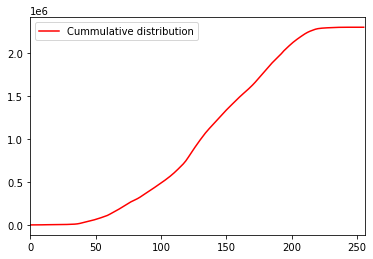

In [11]:
c = getCummulativeDis(hist_gray)
plt.plot(c, label = 'Cummulative distribution', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.savefig('cummulative_gray.png')
plt.show()

### Applying histogram euqualisation on 'img_gray' ###

In [12]:
img_equ = cv.equalizeHist(img_gray)

### Plotting histogram of 'img_equ' ###

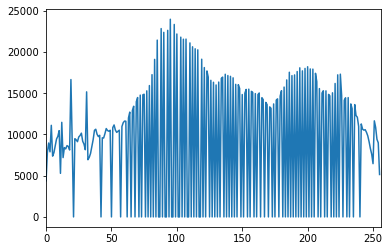

In [13]:
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256])
plt.plot(hist_equ)
plt.xlim([0,256])
plt.savefig('hist_equ.png')
plt.show()

### Calculating and plotting the cummulative distribution of intensity of 'img_equ' ###

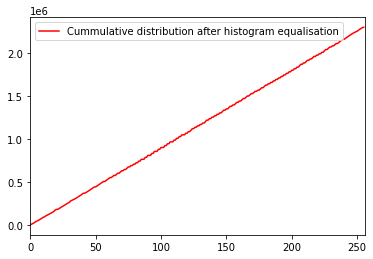

In [14]:
c_equ = getCummulativeDis(hist_equ)
plt.plot(c_equ, label = 'Cummulative distribution after histogram equalisation', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.savefig('cummulative_equ.png')
plt.show()

### Visually comparing 'img_gray' and its histogram equalised version (img_equ), we stack both the original and the histogram equalised version into a new image and save it to 'img_equalisation.png' ###

In [15]:
img_equalisation = np.hstack((img_gray, img_equ)) #stacking images side-by-side
cv.imwrite('img_equalisation.png', img_equalisation) #writing the stacked image to file

True

## Comparing images via their histograms

### Calculating both χ2 distance and KL-divergence between images in the supplied resources (i.e., img1.jpg vs img2.jpg, img1.jpg vs img3.jpg, and img2.jpg vs img3.jpg). ###

In [16]:
img11 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-1.3C\Resources_1.3\img1.jpg')

In [17]:
img_gray11 = cv.cvtColor(img11, cv.COLOR_BGR2GRAY)

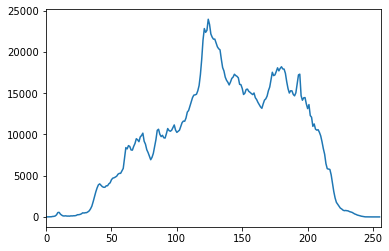

In [18]:
hist_gray11 = cv.calcHist([img_gray11],[0],None,[256],[0,256])
plt.plot(hist_gray11)
plt.xlim([0,256])
plt.show()

In [19]:
img12 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-1.3C\Resources_1.3\img2.jpg')

In [20]:
img_gray12 = cv.cvtColor(img12, cv.COLOR_BGR2GRAY)

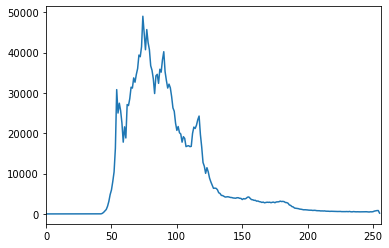

In [21]:
hist_gray12 = cv.calcHist([img_gray12],[0],None,[256],[0,256])
plt.plot(hist_gray12)
plt.xlim([0,256])
plt.show()

In [22]:
img13 = cv.imread("D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-1.3C\Resources_1.3\img3.jpg")

In [23]:
img_gray13 = cv.cvtColor(img13, cv.COLOR_BGR2GRAY)

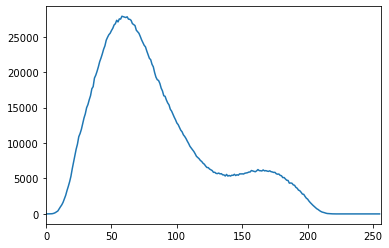

In [24]:
hist_gray13 = cv.calcHist([img_gray13],[0],None,[256],[0,256])
plt.plot(hist_gray13)
plt.xlim([0,256])
plt.show()

### Chi-square distance between the Histograms ###

In [25]:
def chi_square(hist1, hist2):
    result = 0
    n = len(hist1)
    for i in range(0, n):
        result+= ((hist1[i] - hist2[i]) ** 2) / (hist1[i] + hist2[i] + 0.00001)
    return result

In [26]:
Match1 = chi_square(hist_gray11, hist_gray12)
print(Match1)

[1567298.5]


In [27]:
Match2 = chi_square(hist_gray11, hist_gray13)
print(Match2)

[1434813.1]


In [28]:
Match3 = chi_square(hist_gray12, hist_gray13)
print(Match3)

[837586.75]


### Normalization Function ###

In [29]:
def normalise(hist):
    n = []
    s = 0
    for i in range(len(hist)):
        s = s + hist[i]
    for i in range(len(hist)):
        hist[i] = hist[i] / s
    return n

### Normalizing the histogram (hist_gray11) ###

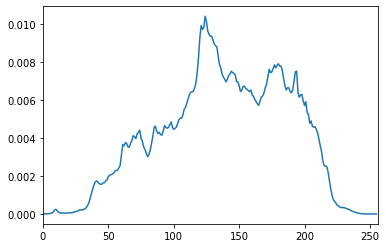

In [30]:
n = normalise(hist_gray11)
plt.plot(hist_gray11)
plt.xlim([0,256])
plt.show()

### Normalizing the histogram(hist_gray12) ###

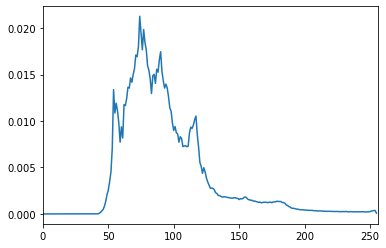

In [31]:
n = normalise(hist_gray12)
plt.plot(hist_gray12)
plt.xlim([0,256])
plt.show()

### Normalizing the histogram(hist_gray13) ###

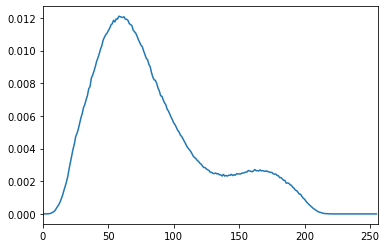

In [32]:
n = normalise(hist_gray13)
plt.plot(hist_gray13)
plt.xlim([0,256])
plt.show()

### KL Divergence between the Histograms ###

In [33]:
def KL_div(hist1, hist2):
    klresult = 0
    n = len(hist1)
    for i in range(0, n):
        klresult += hist1[i]*math.log((hist1[i] + 0.000001)/(hist2[i] + 0.000001))
    return klresult

In [36]:
Match4 = KL_div(hist_gray11, hist_gray12) + KL_div(hist_gray12, hist_gray11)
print(Match4)

[1.7330267]


In [37]:
Match5 = KL_div(hist_gray11, hist_gray13) + KL_div(hist_gray13, hist_gray11)
print(Match5)

[1.6593988]


In [38]:
Match6 = KL_div(hist_gray12, hist_gray13) + KL_div(hist_gray13, hist_gray12)
print(Match6)

[1.9058057]


**Therefore, using 'Chi-Square'distance method between the images, 'img1' and 'img2' are highly correlated. Furthermore, after calculating the KL-Divergence between the three images, 'img2' and 'img3' are most similar.** 